# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

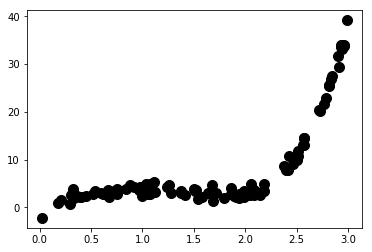

In [8]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [10]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [11]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([  1.58287877,   5.7538243 ,   3.41146828,  16.07967384,
        27.69069933,   6.2194285 ,   2.06416614,   0.54458649,
         9.72574624,   6.85498649,   0.57143722,   2.05247962,
         6.07361835,  26.4787473 ,  17.16954108,   1.19890904,
         2.43714949,   2.30086003,   8.31923949,   6.51927817,
        27.04506208,   5.84681207,   9.81734748,  26.25738229,
         1.17716382,   7.78470678,   3.27233539,   1.62539672,
         6.92322415,   3.50731236,   8.32677349,   1.93852408,
        20.99603848,  13.59618448,   4.24011739,  15.77743319,
         0.91555921,   0.80774874,   7.88646068,  26.29656907])

In [12]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.8264552011206104
Explained variance score: 0.8290522627920343
Median absolute error: 3.425422599732456
Mean squared error: 20.076837273851318
Mean absolute errors: 3.740528999551297


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [13]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
R^2: 0.46706321111690996
Explained variance score: 0.4738070357306048
Median absolute error: 5.718272036611102
Mean squared error: 61.65373584656222
Mean absolute errors: 6.595730512891185
PR2
R^2: 0.8264552011206104
Explained variance score: 0.8290522627920343
Median absolute error: 3.425422599732456
Mean squared error: 20.076837273851318
Mean absolute errors: 3.740528999551297
PR3
R^2: 0.9802169611576174
Explained variance score: 0.9802293654101067
Median absolute error: 1.1793125374632871
Mean squared error: 2.2886358691557716
Mean absolute errors: 1.2303382738765067
PR4
R^2: 0.9912562632986054
Explained variance score: 0.9913203981775334
Median absolute error: 0.6912626677471869
Mean squared error: 1.0115346587903422
Mean absolute errors: 0.8229530747257222
PR5
R^2: 0.9914098581817828
Explained variance score: 0.9914950433889631
Median absolute error: 0.6928035271693465
Mean squared error: 0.9937657628305472
Mean absolute errors: 0.8174808548476173
PR6
R^2: 0.9902034565818014
Ex